<a href="https://colab.research.google.com/github/DivijaGarg/My-Projects/blob/main/Lect_13_ODEs_and_Euler's_Method_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture 13: Introduction to ODEs & Euler's Method**

**Date:** Friday, 06-02-2026

**Unit:** 2 (Differential Equations)

**Topic:** Introduction to ODEs: Euler’s Method implementation in Python

---

## **1. Introduction**

In Unit 1, we dealt with static numbers (roots, integrals, errors). In **Unit 2**, we move to **dynamic systems**—things that change over time.

Almost every problem in Astrophysics is described by a **Differential Equation**:

* **Planetary Orbits:** Newton's Laws ($\vec{F} = m\vec{a}$) are second-order ODEs.
* **Stellar Structure:** Hydrostatic equilibrium ($\frac{dP}{dr} = -\rho g$) is a system of ODEs.
* **Radioactive Decay:** The heating source of planets ($\frac{dN}{dt} = -\lambda N$).

An **Ordinary Differential Equation (ODE)** involves functions of a single independent variable (usually time,  $t$).

Our goal is to find the function $y(t)$ given its rate of change $f(t, y)$:

$$\frac{dy}{dt} = f(t, y)$$

Subject to an **Initial Value**  $y(t_0) = y_0$.

---

## **2. Euler's Method: The Simplest Solver**

### **2.1 The Concept**

Euler's Method is the "first-order" approximation. It uses the definition of the derivative:

$$\frac{dy}{dt} \approx \frac{y(t+h) - y(t)}{h}$$

Rearranging this gives us the algorithm to step forward in time by a small step $h$:
$$y(t+h) \approx y(t) + h \cdot f(t, y)$$

Or in iterative notation:

$$y_{n+1} = y_n + h \cdot f(t_n, y_n)$$

### **2.2 Geometric Interpretation**

Imagine you are walking on a curve, but you are blindfolded. You only know your current position and the **slope** of the ground (the derivative).

1. Look at the slope at your feet.
2. Take a small step  in that direction.
3. Stop, look at the new slope, and repeat.

**Problem:** If the curve bends while you are taking your step, you will overshoot or undershoot. This is the **Truncation Error** of Euler's method.

---

## **3. Implementing Euler's Method in Python**

Let's solve the classic **Radioactive Decay** problem.
$$\frac{dN}{dt} = -\lambda N$$

* $N$: Number of atoms
* $\lambda$: Decay constant
* **Analytical Solution:** $N(t) = N_0 e^{-\lambda t}$

### **3.1 First Principles Implementation**

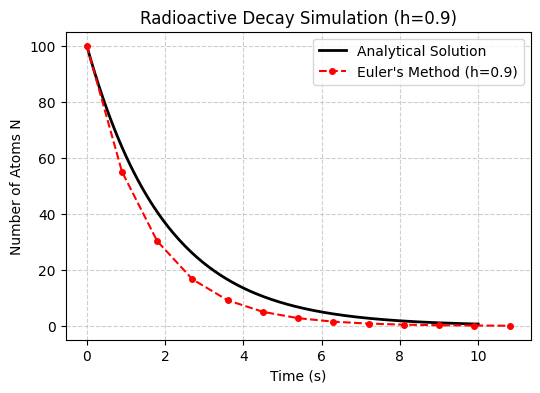

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the Derivative Function f(t, y)
def decay_rate(t, N, decay_const):
    """
    Returns dN/dt = -lambda * N
    """
    return -decay_const * N

# 2. Euler's Method Solver
def euler_method(func, y0, t0, t_end, h, params):
    """
    Solves ODE using Euler's method.

    Parameters:
    func   : The derivative function f(t, y, params)
    y0     : Initial value of y
    t0     : Initial time
    t_end  : End time
    h      : Step size
    params : Extra parameters for the derivative function

    Returns:
    t_values : Array of time steps
    y_values : Array of solution values
    """
    # Create time array
    t_values = np.arange(t0, t_end + h, h) # +h to include endpoint

    # Initialize solution array
    y_values = np.zeros(len(t_values))
    y_values[0] = y0

    # Loop over time steps
    for i in range(1, len(t_values)):
        # Current values
        t_curr = t_values[i-1]
        y_curr = y_values[i-1]

        # Calculate slope
        slope = func(t_curr, y_curr, params)

        # Euler step: y_new = y_old + h * slope
        y_values[i] = y_curr + h * slope

    return t_values, y_values

# 3. System Parameters
N0 = 100.0       # Initial atoms
lambda_val = 0.5 # Decay constant
h_step = 0.9     # Step size (try changing this to 1.0 or 0.01)
t_start = 0.0
t_stop = 10.0

# 4. Run Simulation
t_num, N_num = euler_method(decay_rate, N0, t_start, t_stop, h_step, lambda_val)

# 5. Compare with Analytical Solution
t_ana = np.linspace(t_start, t_stop, 200)
N_ana = N0 * np.exp(-lambda_val * t_ana)

# 6. Plotting
plt.figure(figsize=(6, 4))
plt.plot(t_ana, N_ana, 'k-', linewidth=2, label='Analytical Solution')
plt.plot(t_num, N_num, 'ro--', markersize=4, label=f"Euler's Method (h={h_step})")

plt.title(f"Radioactive Decay Simulation (h={h_step})")
plt.xlabel("Time (s)")
plt.ylabel("Number of Atoms N")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

---

## **4. Error Analysis**

Euler's method is a First-Order Method. This means the error per step is proportional to $h^2$, but the global error (accumulated over time) is proportional to $h$.

If you halve the step size ($h \to h/2$), the error is cut in half. (Advanced methods like RK4 cut the error by factor of 16 or more!).

Let's visualize the error accumulation.

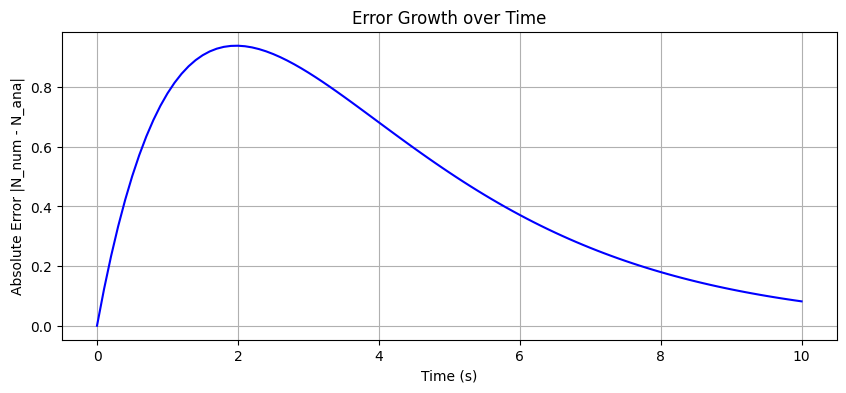

Max Error: 0.93935 atoms


In [ ]:
# Calculate absolute error at each step
# We need to compute analytical values at the specific time steps used by Euler
N_analytical_at_steps = N0 * np.exp(-lambda_val * t_num)
errors = np.abs(N_num - N_analytical_at_steps)

plt.figure(figsize=(10, 4))
plt.plot(t_num, errors, 'b-')
plt.title("Error Growth over Time")
plt.xlabel("Time (s)")
plt.ylabel("Absolute Error |N_num - N_ana|")
plt.grid(True)
plt.show()

print(f"Max Error: {np.max(errors):.5f} atoms")

---

## **5. Astrophysics Application: Simple Harmonic Oscillator (SHO)**

In astrophysics, we often see oscillations (pulsating stars, molecular vibrations).
The equation for a spring (or a pendulum) is:
$$\frac{d^2x}{dt^2} = -\omega^2 x$$

This is a **Second-Order ODE**. To solve it with Euler's method, we must split it into **two First-Order ODEs**:

1. Velocity is the derivative of position: $\frac{dx}{dt} = v$
2. Acceleration is the derivative of velocity: $\frac{dv}{dt} = -\omega^2 x$

### **Vectorized Euler Implementation**

We can store $y = [x, v]$ as a vector and solve them simultaneously.

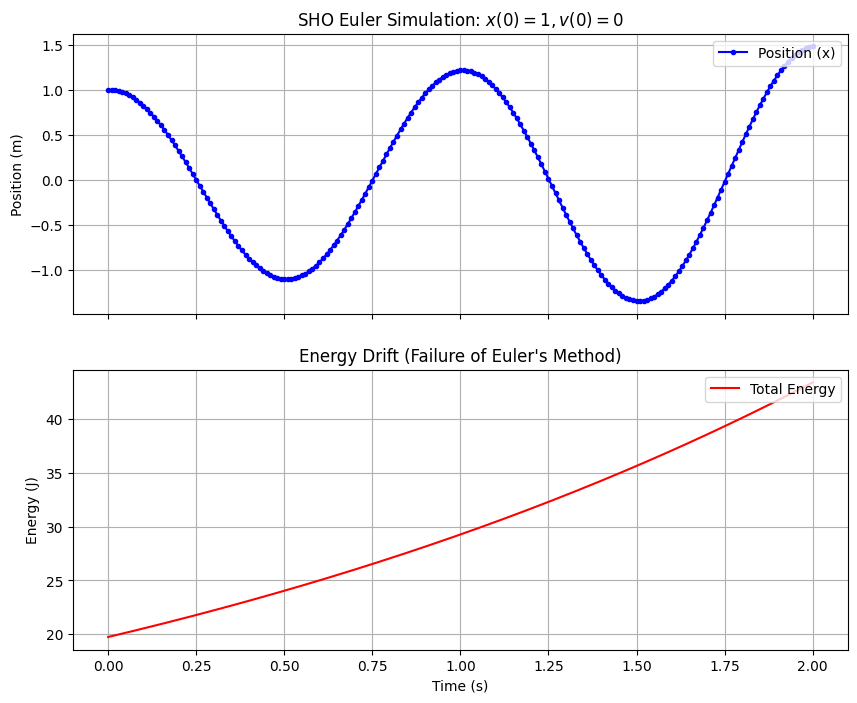

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Modified Euler's Method Solver to handle vector y0
def euler_method(func, y0, t0, t_end, h, params):
    """
    Solves ODE using Euler's method, supporting scalar or vector y0.

    Parameters:
    func   : The derivative function f(t, y, params)
    y0     : Initial value(s) of y (can be a scalar or a numpy array)
    t0     : Initial time
    t_end  : End time
    h      : Step size
    params : Extra parameters for the derivative function

    Returns:
    t_values : Array of time steps
    y_values : Array of solution values (2D if y0 is vector, 1D if y0 is scalar)
    """
    t_values = np.arange(t0, t_end + h, h)

    # Determine if y0 is a scalar or a vector and initialize y_values accordingly
    if np.isscalar(y0):
        y_values = np.zeros(len(t_values))
    else:
        # y0 is an array, so y_values needs to be 2D
        y_values = np.zeros((len(t_values), len(y0)))

    y_values[0] = y0

    for i in range(1, len(t_values)):
        t_curr = t_values[i-1]
        y_curr = y_values[i-1]

        slope = func(t_curr, y_curr, params)

        y_values[i] = y_curr + h * slope

    return t_values, y_values

def sho_derivatives(t, y_vec, omega):
    """
    Returns [dx/dt, dv/dt]
    y_vec[0] is x (position)
    y_vec[1] is v (velocity)
    """
    x = y_vec[0]
    v = y_vec[1]

    dxdt = v
    dvdt = -(omega**2) * x

    return np.array([dxdt, dvdt])

# Parameters
omega = 2.0 * np.pi # Frequency 1 Hz
y0_vec = np.array([1.0, 0.0]) # Start at x=1, v=0 (release from rest)
t_max = 2.0
h_sho = 0.01

# Call the (now fixed) euler_method
t_sho, y_sho = euler_method(sho_derivatives, y0_vec, 0.0, t_max, h_sho, omega)

# Extract x and v
x_vals = y_sho[:, 0]
v_vals = y_sho[:, 1]

# Plot
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Position Plot
ax[0].plot(t_sho, x_vals, 'b.-', label='Position (x)')
ax[0].set_ylabel('Position (m)')
ax[0].set_title(r'SHO Euler Simulation: $x(0)=1, v(0)=0$')
ax[0].grid(True)
ax[0].legend(loc="upper right")

# Energy Plot (Conservation Check)
# Energy E = 0.5*k*x^2 + 0.5*m*v^2. Let's assume k=m*omega^2, m=1.
E_total = 0.5 * (omega**2) * x_vals**2 + 0.5 * v_vals**2
ax[1].plot(t_sho, E_total, 'r-', label='Total Energy')
ax[1].set_ylabel('Energy (J)')
ax[1].set_xlabel('Time (s)')
ax[1].grid(True)
ax[1].legend(loc="upper right")

# Highlight the issue
ax[1].set_title("Energy Drift (Failure of Euler's Method)")

plt.show()

**Critical Observation:** Notice how the Energy increases over time? The amplitude of the oscillation grows!

* Euler's Method is **unstable** for oscillatory problems (it adds fake energy to the system).
* This is why we need **Symplectic Integrators** or **Runge-Kutta** (Lecture 14).

---

## **6. Student Exercises**

### **Problem 1: Falling Object with Air Resistance**

**Physics:** An object falls under gravity  with air drag proportional to velocity squared ($v^2$).

$$\frac{dv}{dt} = g - C_d v^2$$
Where $C_d$ is the drag coefficient.


**Task:**

1. Define the derivative function for a falling rock on Mars ($g=3.71, C_d=0.1$).
2. Use Euler's method to find the velocity $v(t)$ starting from rest ($v=0$).
3. Simulate for 10 seconds.
4. **Identify Terminal Velocity:** At what speed does the velocity stop changing?

In [ ]:
# Student Code Area 1
# Define function: fall_rate(t, v, params)
# Run euler_method
# Plot velocity vs time

### **Problem 2: Population Growth (Stellar Formation)**

**Physics:** The rate of star formation is proportional to the available gas mass $M_g$.

$$\frac{dM_g}{dt} = -k M_g$$

However, let's assume gas is being replenished at a constant rate $R$.
$$\frac{dM_g}{dt} = R - k M_g$$

**Task:**

1. Solve this ODE for $M_g(0) = 0$.
2. Set $R = 10$ and $k = 0.5$.
3. Does the mass explode to infinity or settle at a steady state?

In [ ]:
# Student Code Area 2
# Implement and solve



## **7. Runge-Kutta 4th Order Method (RK4)**

Euler's method is simple but often inaccurate, especially for larger step sizes or oscillatory systems.

The Runge-Kutta methods are a family of numerical integrators that achieve higher accuracy by evaluating the derivative function at several points within each step.

The most common is the **4th Order Runge-Kutta method (RK4)**. It calculates four 'slopes' or 'estimates' within each step to get a more accurate average slope:

1. $k_1 = h f(t_n, y_n)$
2. $k_2 = h f(t_n + h/2, y_n + k_1/2)$
3. $k_3 = h f(t_n + h/2, y_n + k_2/2)$
4. $k_4 = h f(t_n + h, y_n + k_3)$
 Then, the next value $y_{n+1}$ is computed as:

 $y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$

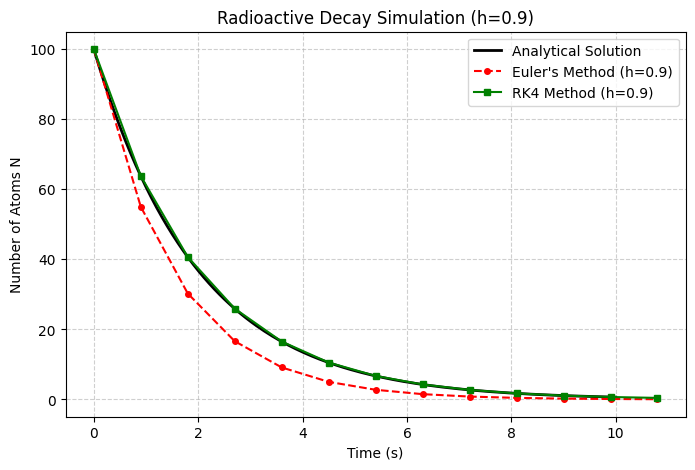

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# RK4 Method Solver
def rk4_method(func, y0, t0, t_end, h, params):
    """
    Solves ODE using the 4th Order Runge-Kutta method.

    Parameters:
    func   : The derivative function f(t, y, params)
    y0     : Initial value(s) of y (scalar or numpy array)
    t0     : Initial time
    t_end  : End time
    h      : Step size
    params : Extra parameters for the derivative function

    Returns:
    t_values : Array of time steps
    y_values : Array of solution values
    """
    t_values = np.arange(t0, t_end + h, h)

    if np.isscalar(y0):
        y_values = np.zeros(len(t_values))
    else:
        y_values = np.zeros((len(t_values), len(y0)))

    y_values[0] = y0

    for i in range(1, len(t_values)):
        t_curr = t_values[i-1]
        y_curr = y_values[i-1]

        # RK4 coefficients
        k1 = h * func(t_curr, y_curr, params)
        k2 = h * func(t_curr + 0.5 * h, y_curr + 0.5 * k1, params)
        k3 = h * func(t_curr + 0.5 * h, y_curr + 0.5 * k2, params)
        k4 = h * func(t_curr + h, y_curr + k3, params)

        # RK4 step
        y_values[i] = y_curr + (k1 + 2*k2 + 2*k3 + k4) / 6.0

    return t_values, y_values


def decay_rate(t, N, decay_const):
    """
    Returns dN/dt = -lambda * N
    """
    return -decay_const * N

# 2. System Parameters
N0 = 100.0       # Initial atoms
lambda_val = 0.5 # Decay constant
h_step = 0.9     # Step size (same as Euler's for comparison)
t_start = 0.0
t_stop = 10.0

# 3. Run RK4 Simulation
t_rk4, N_rk4 = rk4_method(decay_rate, N0, t_start, t_stop, h_step, lambda_val)

# 4. Compare with Analytical Solution
t_ana_plot = np.linspace(t_start, t_stop, 200) # For smooth analytical curve
N_ana_plot = N0 * np.exp(-lambda_val * t_ana_plot)

# 5. Get Euler's method results for plotting comparison
# The euler_method function and its results (t_num, N_num) are expected to be

# For self-containment, the euler_method is redefined here.
def euler_method(func, y0, t0, t_end, h, params):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros(len(t_values))
    y_values[0] = y0
    for i in range(1, len(t_values)):
        t_curr = t_values[i-1]
        y_curr = y_values[i-1]
        slope = func(t_curr, y_curr, params)
        y_values[i] = y_curr + h * slope
    return t_values, y_values

t_num, N_num = euler_method(decay_rate, N0, t_start, t_stop, h_step, lambda_val)


# 6. Plotting Comparison
plt.figure(figsize=(8, 5))
plt.plot(t_ana_plot, N_ana_plot, 'k-', linewidth=2, label='Analytical Solution')
plt.plot(t_num, N_num, 'ro--', markersize=4, label=f"Euler's Method (h={h_step})")
plt.plot(t_rk4, N_rk4, 'gs-', markersize=4, label=f"RK4 Method (h={h_step})")

plt.title(f"Radioactive Decay Simulation (h={h_step})")
plt.xlabel("Time (s)")
plt.ylabel("Number of Atoms N")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## **8. Error Analysis for RK4**

RK4 is a Fourth-Order Method. This means the error per step is proportional to $h^5$, and the global error (accumulated over time) is proportional to $h^4$.

If you halve the step size ($h \to h/2$), the error is cut by a factor of $2^4 = 16$.



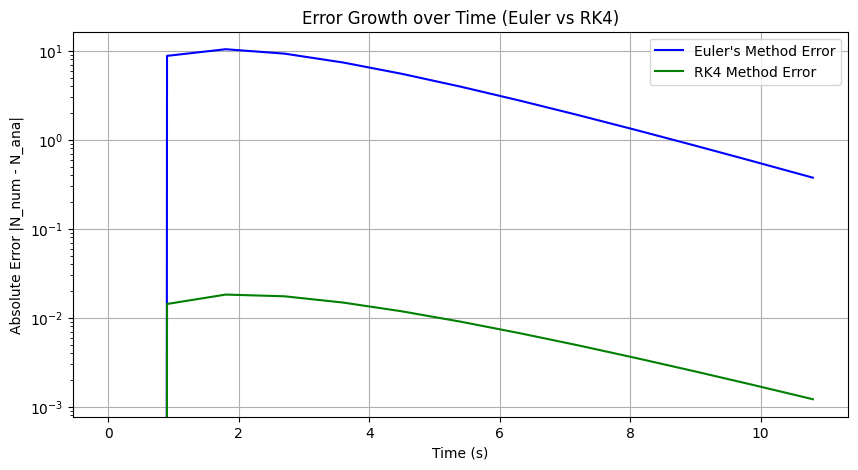

Max Error (Euler): 10.40697 atoms
Max Error (RK4): 0.01823 atoms


In [ ]:
# Calculate absolute error at each step for RK4
N_analytical_at_rk4_steps = N0 * np.exp(-lambda_val * t_rk4)
errors_rk4 = np.abs(N_rk4 - N_analytical_at_rk4_steps)

# Calculate absolute error at each step for Euler (re-using variables)
N_analytical_at_euler_steps = N0 * np.exp(-lambda_val * t_num)
errors_euler = np.abs(N_num - N_analytical_at_euler_steps)

plt.figure(figsize=(10, 5))
plt.plot(t_num, errors_euler, 'b-', label="Euler's Method Error")
plt.plot(t_rk4, errors_rk4, 'g-', label="RK4 Method Error")
plt.title("Error Growth over Time (Euler vs RK4)")
plt.xlabel("Time (s)")
plt.ylabel("Absolute Error |N_num - N_ana|")
plt.legend()
plt.grid(True)
plt.yscale('log') # Use a log scale to better visualize small RK4 errors
plt.show()

print(f"Max Error (Euler): {np.max(errors_euler):.5f} atoms")
print(f"Max Error (RK4): {np.max(errors_rk4):.5f} atoms")


### Observation:

Notice how significantly smaller the error for RK4 is compared to Euler's method, even with the same relatively large step size! This demonstrates the power of higher-order methods.

